# Modelo para la Ciudad de Barranquilla

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##Sección de código para ejecutar el ejercicio en COLAB sin realizar ningún cambio adicional.
#from google.colab import drive
#drive.mount('/content/drive')
#baseUrl = '/content/drive/Shared drives/Analitica Predictiva/covid-19-flr-analitica-predictiva'
#os.chdir(baseUrl)

Librerias requeridas para realizar los modelos.

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Modelo Corto Plazo

In [4]:
ciudades = ['Bogotá D.C.','Medellín','Cali','Barranquilla', 'Cartagena de Indias']
names = ['Bogota','Medellin','Cali','Barranquilla','Cartagena']
id_city = 3
name = names[id_city]
urlDataSet = 'Datos/data_{}.pickle'.format(name)

Se carga el dataset generado en la sección de preprocesamiento, se muestran los últimos 20 registros, para validar visualmente los ultimos días de información.

In [5]:
df_city = pd.read_pickle(urlDataSet)
df = df_city.copy()
df.tail(20)

,dias,semana,infectados,recuperados,muertos,acumulado_infectados,acumulado_recuperados,acumulado_muertos,activos
fecha_infeccioso,,,,,,,,,
2020-08-16,163,23,65.0,325.0,3.0,35017.0,28727.0,1668.0,4622.0
2020-08-17,164,23,59.0,412.0,4.0,35076.0,29139.0,1672.0,4265.0
2020-08-18,165,23,84.0,247.0,1.0,35160.0,29386.0,1673.0,4101.0
2020-08-19,166,23,67.0,257.0,2.0,35227.0,29643.0,1675.0,3909.0
2020-08-20,167,23,136.0,608.0,7.0,35363.0,30251.0,1682.0,3430.0
2020-08-21,168,24,74.0,267.0,2.0,35437.0,30518.0,1684.0,3235.0
2020-08-22,169,24,99.0,188.0,0.0,35536.0,30706.0,1684.0,3146.0
2020-08-23,170,24,29.0,211.0,2.0,35565.0,30917.0,1686.0,2962.0
2020-08-24,171,24,32.0,257.0,4.0,35597.0,31174.0,1690.0,2733.0


### Activos

Para la predicción de casos activos se usó una Regressión Lasso con caracteristicas Polinomiales de grado 5; previamente se estandarizaron los datos, y se entrenaron con un conjunto del 70% de los datos; estos datos se toman aleatoriamente, pero al graficarlos se orden en secuencia.

In [6]:
totalDays = len(df['dias'].values)
X = df['dias'].values[0:totalDays-5].reshape(-1,1) #Variable independiente.
y = df['activos'].values[0:totalDays-5].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df['dias'].values[totalDays-5:].reshape(-1,1)
y_v = df['activos'].values[totalDays-5:].reshape(-1,1)
#Se obtiene el 70% para entrenamiento y 30% para pruebas.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
#Se crea un pipeline con el escalado, las caracteristicas polinomiales y la regresión lasso
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123))
#Se realiza el entrenamiento.
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso(random_state=123))])

Se realizan las predicciones sobre el dataset de pruebas, adicionalmente se establece el pico en el día 175, por lo cual para fines de prueba se realizan predicciones desde dicho día, hasta el día 200 de la pandemia, para probar la predicción futura de los modelos a corto plazo.

In [7]:
#Obtener predicciones para los datos de prueba.
y_pred = pipe.predict(X_test)
#Predicciones futuras.
x_pred_future = np.arange(totalDays-10,totalDays,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

In [8]:
def GetMax(*args):
    arr = np.array([[0]])
    for arg in args:
        s = [x for x in arg.shape]
        l = np.prod(s)
        a = np.array(arg.reshape(1,l))
        arr = np.concatenate((a,arr),axis=1)
    return arr.max()

In [9]:
def GetPeak(*args):
    x_arr = np.array([[0]])
    y_arr = np.array([[0]])
    for x,y in args:
        s = [x for x in x.shape]
        l = np.prod(s)
        xr = np.array(x.reshape(1,l))
        yr = np.array(y.reshape(1,l))
        x_arr = np.concatenate((x_arr,xr),axis=1)
        y_arr = np.concatenate((y_arr,yr),axis=1)
        print(x_arr)
        print(y_arr)
        print(y_arr.max())
    return x_arr[0][y_arr.argmax()]

In [10]:
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)
Xpeak = GetPeak((X_test,y_pred))

[[  0 138  60 137  77  90 159  41 136 166  93 154 141 164  33  31 152  82
  122  42  87 139 147 151 162  79 169 157  95  53  10  23  37 134 110 167
  120 142   8  72 114 148 163  36  20 121  28  13  88  24 100 127 143 144
   85]]
[[    0.         14735.51114939  -250.69192804 14947.0696069
   3816.57037558  8252.30853826  7256.86811276  -878.69628664
  15142.05999696  4222.56259633  9304.50655704  9417.56080984
  14004.03645108  5068.30336998   -70.76098038   179.11171178
  10241.97096995  5457.23933219 16079.5871738   -946.16769116
   7193.59231357 14507.62654991 12138.69951571 10641.73995483
   5936.81905965  4457.07180235  3024.68749798  8132.97685533
   9994.46981654  -984.52171261  1122.30558972  1139.90394429
   -525.58550002 15481.55283836 14382.32981661  3812.16140994
  15944.76494943 13729.00713758   743.88856569  2336.06387399
  15173.55458113 11781.27904855  5500.4701255   -419.60445603
   1395.77436468 16020.16674134   560.75287985  1450.97808226
   7546.24232236  1035.5965

Se grafican los datos.

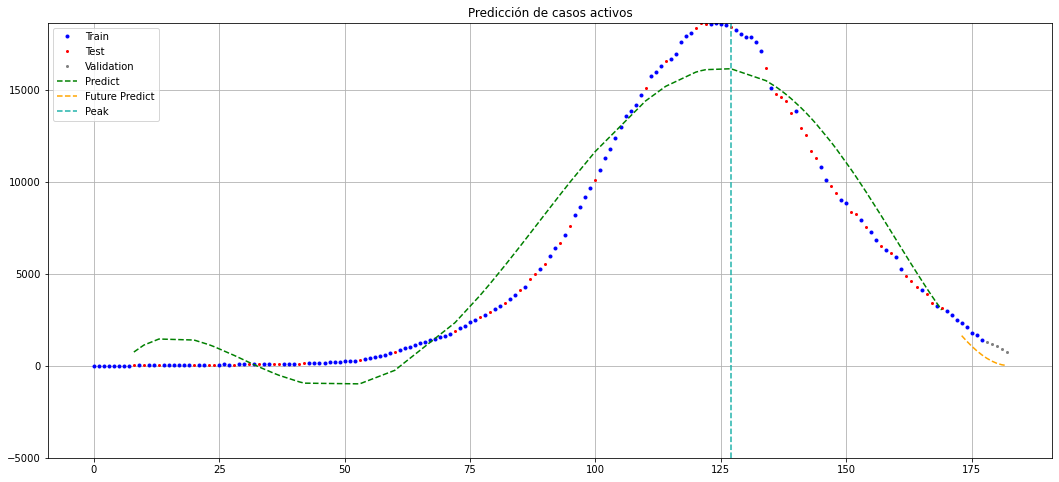

In [11]:
f = plt.figure(figsize=(18,8))
plt.title('Predicción de casos activos')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'--g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pcp_{}_activos'.format(name))

In [12]:
s = [y_pred_future.shape]
l = np.prod(s)


Se calculan las métricas de la regresión, en este caso se calculan las metricas completas sobre el conjunto de prueba, adicionalmente se computan las metricas solo desde el pico en adelante como indicar de las predicciones futuras.

In [13]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (5 days) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (5 days) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

     ---- Métricas ----
Total RMSE:		1556
Total MAE:		1343
Future (5 days) RMSE:	881
Future (5 days) MAE:	879


### Recuperados
Para la predicción de casos recuperados se usó una Regressión Lasso con caracteristicas Polinomiales de grado 4; previamente se estandarizaron los datos, y se entrenaron con un conjunto del 70% de los datos; estos datos se toman aleatoriamente, pero al graficarlos se orden en secuencia.

In [14]:
totalDays = len(df['dias'].values)
X = df['dias'].values[0:totalDays-5].reshape(-1,1) #Variable independiente.
y = df['acumulado_recuperados'].values[0:totalDays-5].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df['dias'].values[totalDays-5:].reshape(-1,1)
y_v = df['acumulado_recuperados'].values[totalDays-5:].reshape(-1,1)
#Se obtiene el 70% para entrenamiento y 30% para pruebas.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
#Se crea un pipeline con el escalado, las caracteristicas polinomiales y la regresión lasso
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=4),Lasso(random_state=123))
#Se realiza el entrenamiento.
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('lasso', Lasso(random_state=123))])

Se realizan las predicciones sobre el dataset de pruebas, adicionalmente se establece el pico en el día 175, por lo cual para fines de prueba se realizan predicciones desde dicho día, hasta el día 200 de la pandemia, para probar la predicción futura de los modelos a corto plazo.

In [15]:
#Obtener predicciones para los datos de prueba.
y_pred = pipe.predict(X_test)
#Predicciones futuras.
x_pred_future = np.arange(totalDays-10,totalDays,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

In [16]:
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

Se grafican los datos.

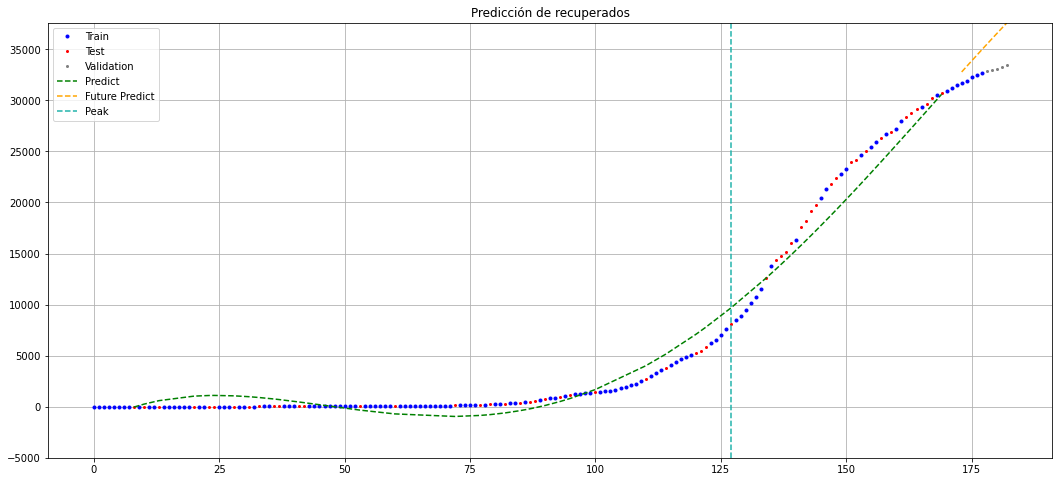

In [17]:
f = plt.figure(figsize=(18,8))
plt.title('Predicción de recuperados')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'--g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pcp_{}_recuperados'.format(name))

Se calculan las métricas de la regresión, en este caso se calculan las metricas completas sobre el conjunto de prueba, adicionalmente se computan las metricas solo desde el pico en adelante como indicar de las predicciones futuras.

In [18]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (5 days) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (5 days) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))


     ---- Métricas ----
Total RMSE:		1455
Total MAE:		1207
Future (5 days) RMSE:	3460
Future (5 days) MAE:	3419


### Muertes
Para la predicción de las muertes se usó una Regressión Lasso con caracteristicas Polinomiales de grado 6; previamente se estandarizaron los datos, y se entrenaron con un conjunto del 70% de los datos; estos datos se toman aleatoriamente, pero al graficarlos se orden en secuencia.

In [19]:
totalDays = len(df['dias'].values)
X = df['dias'].values[0:totalDays-5].reshape(-1,1) #Variable independiente.
y = df['acumulado_muertos'].values[0:totalDays-5].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df['dias'].values[totalDays-5:].reshape(-1,1)
y_v = df['acumulado_muertos'].values[totalDays-5:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=6),Lasso(random_state=123,max_iter=10000))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('lasso', Lasso(max_iter=10000, random_state=123))])

In [20]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(totalDays-10,totalDays,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

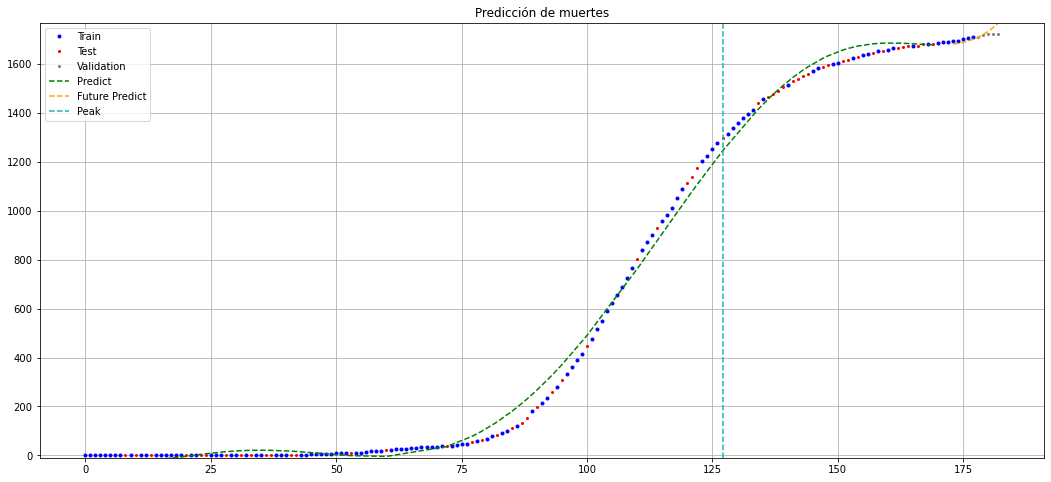

In [21]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción de muertes')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'--g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-10,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-10,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pcp_{}_muertes'.format(name))

In [22]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (5 days) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (5 days) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

     ---- Métricas ----
Total RMSE:		37
Total MAE:		30
Future (5 days) RMSE:	24
Future (5 days) MAE:	17


### Infectados
Para la predicción de los infectados se usó una Regressión Lasso con caracteristicas Polinomiales de grado 4; previamente se estandarizaron los datos, y se entrenaron con un conjunto del 70% de los datos; estos datos se toman aleatoriamente, pero al graficarlos se orden en secuencia.

In [23]:
totalDays = len(df['dias'].values)
X = df['dias'].values[0:totalDays-5].reshape(-1,1) #Variable independiente.
y = df['acumulado_infectados'].values[0:totalDays-5].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df['dias'].values[totalDays-5:].reshape(-1,1)
y_v = df['acumulado_infectados'].values[totalDays-5:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso(random_state=123))])

In [24]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(totalDays-10,totalDays,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

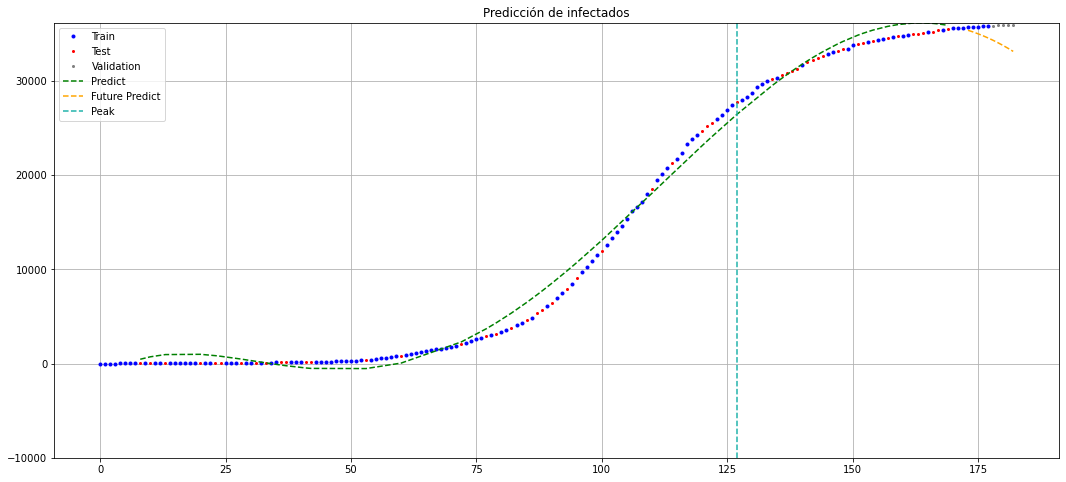

In [25]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción de infectados')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'--g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-10000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-10000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pcp_{}_infectados'.format(name))

In [26]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (5 days) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (5 days) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

     ---- Métricas ----
Total RMSE:		1035
Total MAE:		877
Future (5 days) RMSE:	2203
Future (5 days) MAE:	2159


## Modelo Mediano Plazo
Para los modelos de mediano plazo, se sigue la misma dinámica que en corto plazo, pero se trabaja con un conjunto de datos que se preprocesó para que tenga los datos acumulados semanalmente, esto permite obtener las predicciones de Infectados, recuperados y muertos por semana.

In [27]:
urlDataset_w = 'Datos/data_weekly_{}.pickle'.format(name)
df_w = pd.read_pickle(urlDataset_w)
df_w.tail(20)

,infectados,recuperados,muertos,acumulado_infectados,acumulado_recuperados,acumulado_muertos,activos
semana,,,,,,,
7,237.0,9.0,6.0,481.0,47.0,11.0,423.0
8,554.0,27.0,13.0,1035.0,74.0,24.0,937.0
9,640.0,27.0,11.0,1675.0,101.0,35.0,1539.0
10,1056.0,79.0,13.0,2731.0,180.0,48.0,2503.0
11,1316.0,147.0,44.0,4047.0,327.0,92.0,3628.0
12,2379.0,383.0,104.0,6426.0,710.0,196.0,5520.0
13,3822.0,545.0,164.0,10248.0,1255.0,360.0,8633.0
14,4372.0,425.0,231.0,14620.0,1680.0,591.0,12349.0
15,4906.0,1282.0,248.0,19526.0,2962.0,839.0,15725.0


### Activos

In [28]:
totalW = len(df_w.index.values)
X = df_w.index.values[0:totalW-3].reshape(-1,1) #Variable independiente.
y = df_w['activos'].values[0:totalW-3].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df_w.index.values[totalW-3:].reshape(-1,1)
y_v = df_w['activos'].values[totalW-3:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(max_iter=10000,random_state=123))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso(max_iter=10000, random_state=123))])

El pico de la pandemia se grafica en la semana:

In [29]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(0,totalW,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)
Xpeak = GetPeak((X_test,y_pred))
Xpeak

[[ 0  5 20 21 18 15  8  7 11]]
[[    0.         -1003.72697849 13508.17758794 10598.25228692
  16506.87746741 14349.29228541  -412.73327707 -1167.67521422
   4990.65807683]]
16506.87746740928


18

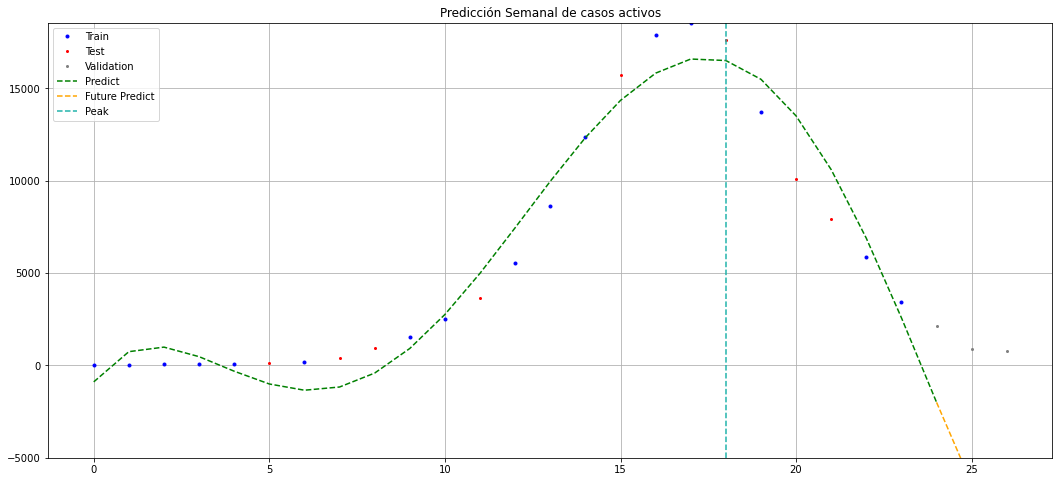

In [30]:
f = plt.figure(figsize=(18,8))
plt.title('Predicción Semanal de casos activos')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(x_pred_future[0:totalW-2],y_pred_future[0:totalW-2],'--g',label='Predict')
plt.plot(x_pred_future[totalW-3:],y_pred_future[totalW-3:],'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pmp_{}_activos'.format(name))

In [31]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (3 weeks) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (3 weeks) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

     ---- Métricas ----
Total RMSE:		1918
Total MAE:		1749
Future (3 weeks) RMSE:	7910
Future (3 weeks) MAE:	7419


### Recuperados

In [32]:
totalW = len(df_w.index.values)
X = df_w.index.values[0:totalW-3].reshape(-1,1) #Variable independiente.
y = df_w['acumulado_recuperados'].values[0:totalW-3].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df_w.index.values[totalW-3:].reshape(-1,1)
y_v = df_w['acumulado_recuperados'].values[totalW-3:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123,max_iter=10000))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso(max_iter=10000, random_state=123))])

In [33]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(0,totalW,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

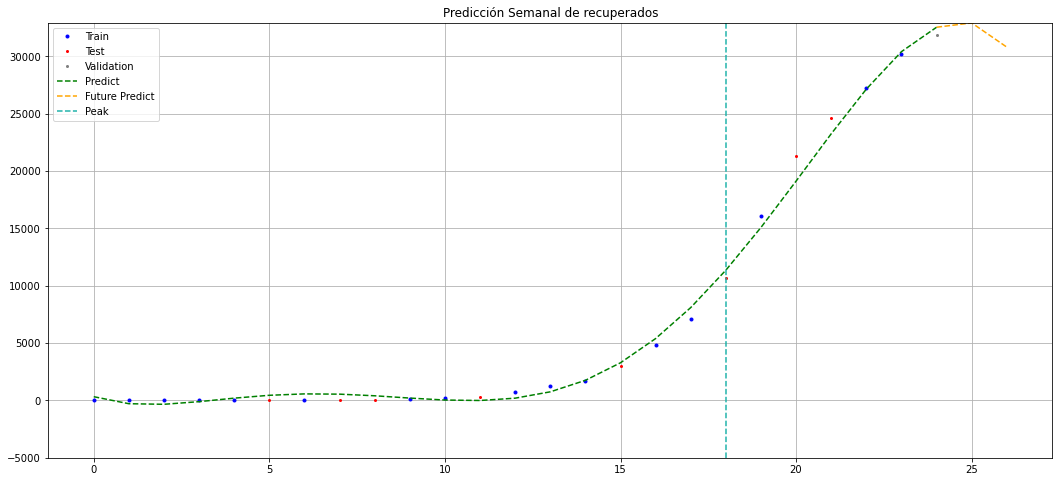

In [34]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción Semanal de recuperados')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(x_pred_future[0:totalW-2],y_pred_future[0:totalW-2],'--g',label='Predict')
plt.plot(x_pred_future[totalW-3:],y_pred_future[totalW-3:],'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pmp_{}_recuperados'.format(name))

In [35]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (3 weeks) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (3 weeks) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

     ---- Métricas ----
Total RMSE:		1001
Total MAE:		770
Future (3 weeks) RMSE:	1560
Future (3 weeks) MAE:	1198


### Muertos

In [36]:
totalW = len(df_w.index.values)
X = df_w.index.values[0:totalW-3].reshape(-1,1) #Variable independiente.
y = df_w['acumulado_muertos'].values[0:totalW-3].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df_w.index.values[totalW-3:].reshape(-1,1)
y_v = df_w['acumulado_muertos'].values[totalW-3:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=7),Lasso(random_state=123,max_iter=10000))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('lasso', Lasso(max_iter=10000, random_state=123))])

In [37]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(0,totalW,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

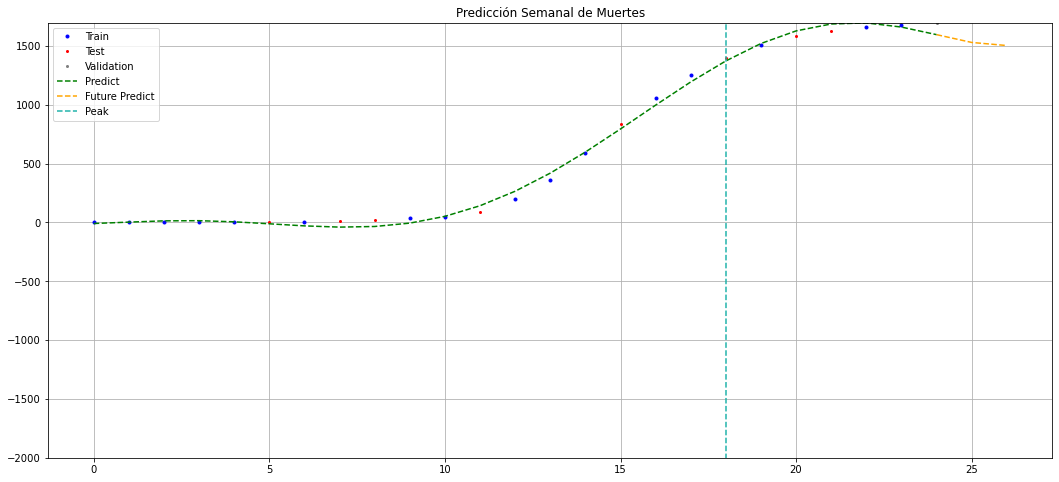

In [38]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción Semanal de Muertes')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(x_pred_future[0:totalW-2],y_pred_future[0:totalW-2],'--g',label='Predict')
plt.plot(x_pred_future[totalW-3:],y_pred_future[totalW-3:],'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-2000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pmp_{}_muertes'.format(name))

In [39]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (3 weeks) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (3 weeks) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

     ---- Métricas ----
Total RMSE:		46
Total MAE:		44
Future (3 weeks) RMSE:	179
Future (3 weeks) MAE:	171
